ValueError: x and y must have same first dimension, but have shapes (10,) and (4,)

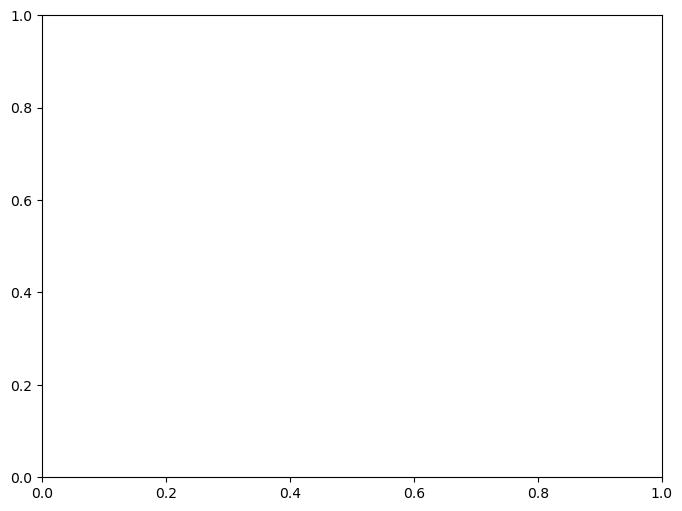

In [5]:
import numpy as np
import matplotlib.pyplot as plt


rho_sat = 2.7e14  
P0_sly = 3.16e34  
P0_ps = 1.58e35 


num_segments = 10
rho_values = np.logspace(np.log10(rho_sat), np.log10(8 * rho_sat), num_segments)


def generate_eos(num_eos=10):
    eos_set = []
    for _ in range(num_eos):
        pressures = [P0_sly if np.random.rand() > 0.5 else P0_ps]  
        for i in range(1, num_segments):
            Gamma = [1,2,3]
            for gamma in Gamma:
                K = pressures[-1] / rho_values[i-1]**gamma
                P_next = K * rho_values[i]**gamma
                pressures.append(P_next)
            
            eos_set.append((rho_values, np.array(pressures)))
    
    return eos_set

# Generate 100 EOS models
eos_models = generate_eos(10)

# Plot Figure 3: Pressure vs. Density for all EOS
plt.figure(figsize=(8, 6))
for rho, P in eos_models:
    plt.plot(rho, P, color='gray', alpha=0.3)  # Light gray for many EOS curves
plt.plot(rho_values, eos_models[0][1], color='black', lw=2, label="Example EOS")

# Formatting the plot
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Density (g/cm³)")
plt.ylabel("Pressure (dyne/cm²)")
plt.title("Extreme Mock EOS - Figure 3 Recreation")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)

# Show plot
plt.show()


C:\Users\vasil\AppData\Local\Temp\ipykernel_22140\2207954275.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


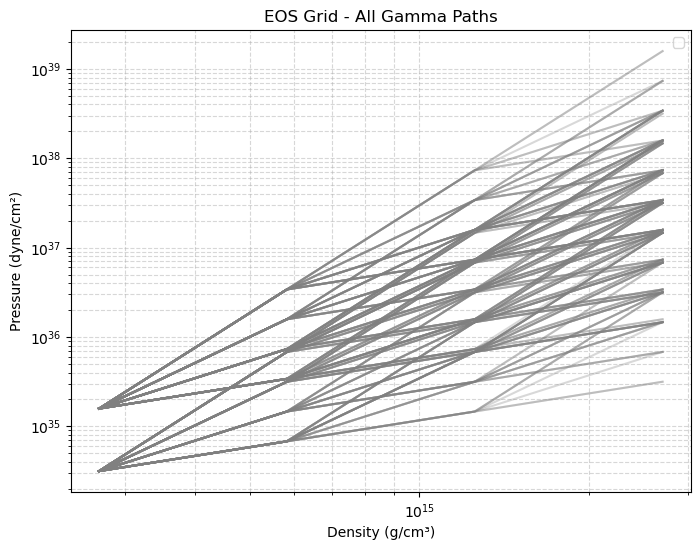

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Constants
rho_sat = 2.7e14  # Nuclear saturation density (g/cm^3)
P0_sly = 3.16e34  # Starting pressure for SLy EOS (dyne/cm²)
P0_ps = 1.58e35  # Starting pressure for PS EOS (dyne/cm²)

# Fiducial densities (logarithmically spaced from 1 to 8 * rho_sat)
num_segments = 4
rho_values = np.logspace(np.log10(rho_sat), np.log10(10 * rho_sat), num_segments)

# Generate all possible Gamma sequences (each segment has Γ = {1,2,3})
gamma_combinations = list(itertools.product([1,2,3,4], repeat=num_segments))

# Function to generate EOS grid
def generate_eos_grid():
    eos_grid = []
    
    for gamma_values in gamma_combinations:
        # Choose SLy or PS starting pressure
        pressures = [P0_sly if np.random.rand() > 0.5 else P0_ps]
        for i in range(1, num_segments):
            Gamma = gamma_values[i]  # Pick the assigned Gamma for this density segment
            K = pressures[-1] / rho_values[i-1]**Gamma
            P_next = K * rho_values[i]**Gamma
            pressures.append(P_next)
        
        # Store EOS as a tuple (density values, pressures, gamma path)
        eos_grid.append((rho_values, np.array(pressures), gamma_values))
    return eos_grid

# Generate EOS Grid
eos_models = generate_eos_grid()

# Plot Figure 3: Pressure vs. Density for all EOS in grid
plt.figure(figsize=(8, 6))
for rho, P, gamma in eos_models:
    plt.plot(rho, P, color='gray', alpha=0.3)  # Light gray for many EOS curves

# plt.plot(eos_models[0][0], eos_models[0][1], color='black', lw=2, label="Example EOS")

# Formatting the plot
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Density (g/cm³)")
plt.ylabel("Pressure (dyne/cm²)")
plt.title("EOS Grid - All Gamma Paths")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)

# Show plot
plt.show()


In [2]:
gamma_combinations

[(1, 1, 1, 1),
 (1, 1, 1, 2),
 (1, 1, 1, 3),
 (1, 1, 1, 4),
 (1, 1, 2, 1),
 (1, 1, 2, 2),
 (1, 1, 2, 3),
 (1, 1, 2, 4),
 (1, 1, 3, 1),
 (1, 1, 3, 2),
 (1, 1, 3, 3),
 (1, 1, 3, 4),
 (1, 1, 4, 1),
 (1, 1, 4, 2),
 (1, 1, 4, 3),
 (1, 1, 4, 4),
 (1, 2, 1, 1),
 (1, 2, 1, 2),
 (1, 2, 1, 3),
 (1, 2, 1, 4),
 (1, 2, 2, 1),
 (1, 2, 2, 2),
 (1, 2, 2, 3),
 (1, 2, 2, 4),
 (1, 2, 3, 1),
 (1, 2, 3, 2),
 (1, 2, 3, 3),
 (1, 2, 3, 4),
 (1, 2, 4, 1),
 (1, 2, 4, 2),
 (1, 2, 4, 3),
 (1, 2, 4, 4),
 (1, 3, 1, 1),
 (1, 3, 1, 2),
 (1, 3, 1, 3),
 (1, 3, 1, 4),
 (1, 3, 2, 1),
 (1, 3, 2, 2),
 (1, 3, 2, 3),
 (1, 3, 2, 4),
 (1, 3, 3, 1),
 (1, 3, 3, 2),
 (1, 3, 3, 3),
 (1, 3, 3, 4),
 (1, 3, 4, 1),
 (1, 3, 4, 2),
 (1, 3, 4, 3),
 (1, 3, 4, 4),
 (1, 4, 1, 1),
 (1, 4, 1, 2),
 (1, 4, 1, 3),
 (1, 4, 1, 4),
 (1, 4, 2, 1),
 (1, 4, 2, 2),
 (1, 4, 2, 3),
 (1, 4, 2, 4),
 (1, 4, 3, 1),
 (1, 4, 3, 2),
 (1, 4, 3, 3),
 (1, 4, 3, 4),
 (1, 4, 4, 1),
 (1, 4, 4, 2),
 (1, 4, 4, 3),
 (1, 4, 4, 4),
 (2, 1, 1, 1),
 (2, 1, 1, 2),
 (2, 1, 1,

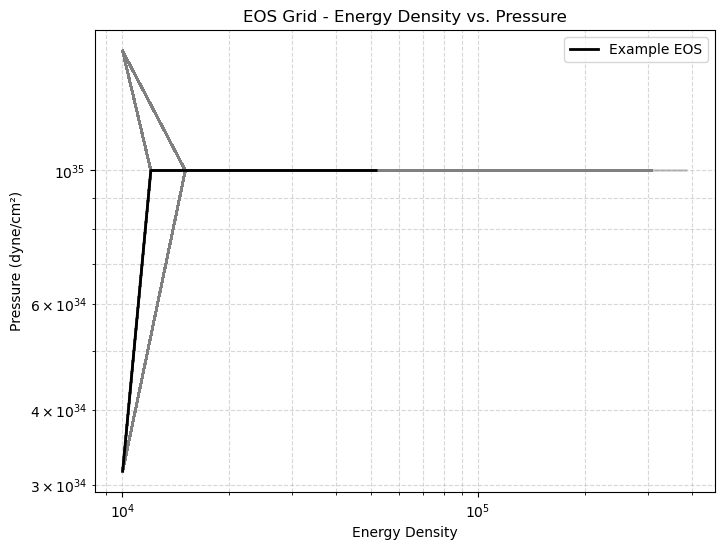

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.optimize import fsolve

# Constants
rho_sat = 2.7e14  # Nuclear saturation density (g/cm^3)
P0_sly = 3.16e34  # Starting pressure for SLy EOS (dyne/cm²)
P0_ps = 1.58e35  # Starting pressure for PS EOS (dyne/cm²)

# Fiducial densities (logarithmically spaced from 1 to 10 * rho_sat)
num_segments = 10
rho_values = np.logspace(np.log10(rho_sat), np.log10(10 * rho_sat), num_segments)

# Generate all possible Gamma sequences (each segment has Γ = {1,5})
gamma_combinations = list(itertools.product([1, 5], repeat=num_segments))

# Energy density function E(P)
def energy_density(P):
    return (
        9805.95 * (1 - np.exp(-0.000193624 * P)) +
        212.072 * (1 - np.exp(-0.401508 * P)) +
        1.69483
    )

# Solve for P given E numerically
def pressure_from_energy(E):
    def equation(P):
        return energy_density(P) - E  # Solve E(P) - E = 0

    P_guess = 1e35  # Initial guess for pressure
    P_solution, = fsolve(equation, P_guess)  # Solve numerically
    return P_solution

# Generate EOS grid using energy density equation
def generate_eos_grid():
    eos_grid = []
    
    for gamma_values in gamma_combinations:
        pressures = [P0_sly if np.random.rand() > 0.5 else P0_ps]  # Choose SLy or PS
        energy_densities = [energy_density(pressures[0])]  # Compute E(P)
        
        for i in range(1, num_segments):
            Gamma = gamma_values[i]  # Pick the assigned Gamma for this density segment
            
            # Compute next Energy Density using Gamma
            E_next = energy_densities[-1] * (1.2 if Gamma == 1 else 1.5)  # Increase factor based on Gamma
            
            # Solve for Pressure from Energy Density
            P_next = pressure_from_energy(E_next)
            
            pressures.append(P_next)
            energy_densities.append(E_next)
        
        # Store EOS as a tuple (energy densities, pressures, gamma path)
        eos_grid.append((np.array(energy_densities), np.array(pressures), gamma_values))
    
    return eos_grid

# Generate EOS Grid
eos_models = generate_eos_grid()

# Plot Figure: Energy Density vs. Pressure for all EOS in grid
plt.figure(figsize=(8, 6))
for E, P, gamma in eos_models:
    plt.plot(E, P, color='gray', alpha=0.3)  # Light gray for many EOS curves

plt.plot(eos_models[0][0], eos_models[0][1], color='black', lw=2, label="Example EOS")

# Formatting the plot
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy Density")
plt.ylabel("Pressure (dyne/cm²)")
plt.title("EOS Grid - Energy Density vs. Pressure")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)

# Show plot
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants in MeV, fm units
hbar_c = 197.33  # MeV·fm
m_n = 939  # MeV (Neutron mass)
G_cgs = 6.674e-8  # cm³ g⁻¹ s⁻²
c2 = (hbar_c / 1.0)**2  # c² in MeV fm
Msun_cgs = 1.989e33  # g
km_to_fm = 1e18  # 1 km = 10^18 fm
MeVfm3_to_cgs = 1.602e33  # Convert MeV/fm³ to cgs

# Convert rho_sat to fm⁻³
rho_sat_cgs = 2.7e14  # g/cm³
m_n_cgs = 1.675e-24  # g
rho_sat_fm3 = rho_sat_cgs / m_n_cgs  # Convert to fm⁻³

# Fiducial densities (log-spaced from 1 to 10 * rho_sat in fm⁻³)
num_segments = 10
rho_values = np.logspace(np.log10(rho_sat_fm3), np.log10(10 * rho_sat_fm3), num_segments)

# Polytropic constant (example)
K_mev = 5.0  

# Define EOS models for Gamma = 1, 2, 3
Gamma_values = [1, 2, 3]

# Function to compute energy density using Equations (7) and (8)
def energy_density(rho, K, Gamma):
    if Gamma == 1:
        return K * rho * np.log(rho) + rho * c2  # Equation (8)
    else:
        return (K * rho**Gamma) / (Gamma - 1) + rho * c2  # Equation (7)

# Function to compute pressure using the polytropic relation
def pressure(rho, K, Gamma):
    return K * rho**Gamma  # P = K * rho^Γ

# Solve the TOV equations
def tov_equations(r, y, K, Gamma):
    P, m = y
    rho = (P / K) ** (1 / Gamma)  # Inverting P = K * rho^Γ to get rho(P)
    eps = energy_density(rho, K, Gamma)  # Compute energy density
    
    dPdr = - (G_cgs * eps * (m + 4 * np.pi * r**3 * P / c2)) / (r**2 * (1 - 2 * G_cgs * m / (r * c2)))
    dmdr = 4 * np.pi * r**2 * eps * MeVfm3_to_cgs  # Convert MeV/fm³ to g/cm³
    
    return [dPdr, dmdr]

# Function to solve TOV for each EOS and generate M-R curves
def solve_tov_for_eos(K, Gamma):
    radii = []
    masses = []
    
    for central_pressure in np.logspace(33, 36, 10):  # Vary central pressure
        P0 = central_pressure
        m0 = 0  # Initial mass
        
        # Solve TOV equations
        sol = solve_ivp(
            tov_equations, 
            [1e-10, 20 * km_to_fm],  # Integrate from small radius to ~20 km
            [P0, m0], 
            args=(K, Gamma), 
            dense_output=True, 
            method='RK45'
        )
        
        r_vals = sol.t / km_to_fm  # Convert fm to km
        P_vals, M_vals = sol.y
        
        # Find the radius where P -> 0 (stellar surface)
        surface_idx = np.where(P_vals <= 1e30)[0][0]
        R_star = r_vals[surface_idx]  # Radius in km
        M_star = M_vals[surface_idx] / Msun_cgs  # Convert to solar masses
        
        radii.append(R_star)
        masses.append(M_star)
    
    return np.array(radii), np.array(masses)

# Generate M-R curves for different Gamma values
mr_data = {}

for Gamma in Gamma_values:
    R, M = solve_tov_for_eos(K_mev, Gamma)
    mr_data[Gamma] = (R, M)

# Plot Mass-Radius (M-R) Diagram
plt.figure(figsize=(8, 6))
for Gamma, (R, M) in mr_data.items():
    plt.plot(R, M, label=f"Gamma = {Gamma}")

# Formatting
plt.xlabel("Radius (km)")
plt.ylabel("Mass (Solar Masses)")
plt.title("Neutron Star M-R Relation for Different EOS")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)

 
# Show plot
plt.show()


C:\Users\vasil\AppData\Local\Temp\ipykernel_22140\3861067598.py:46: RuntimeWarning: overflow encountered in scalar multiply
  dPdr = - (G_cgs * eps * (m + 4 * np.pi * r**3 * P / c2)) / (r**2 * (1 - 2 * G_cgs * m / (r * c2)))
C:\Users\vasil\AppData\Local\Temp\ipykernel_22140\3861067598.py:32: RuntimeWarning: invalid value encountered in log
  return K * rho * np.log(rho) + rho * c2  # Equation (8)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Constants
rho_sat = 2.7e14  # Nuclear saturation density (g/cm³)
P0_sly = 3.16e34  # Starting pressure for SLy EOS (dyne/cm²)
P0_ps = 1.58e35  # Starting pressure for PS EOS (dyne/cm²)
# Constants in MeV, fm units
hbar_c = 197.33  # MeV·fm
m_n = 939  # MeV (Neutron mass)
G_cgs = 6.674e-8  # cm³ g⁻¹ s⁻²
c2 = (hbar_c / 1.0)**2  # c² in MeV fm
Msun_cgs = 1.989e33  # g
km_to_fm = 1e18  # 1 km = 10^18 fm
MeVfm3_to_cgs = 1.602e33  # Convert MeV/fm³ to cgs
# Convert rho_sat to fm⁻³
rho_sat_cgs = 2.7e14  # g/cm³
m_n_cgs = 1.675e-24  # g
rho_sat_fm3 = rho_sat_cgs / m_n_cgs  # Convert to fm⁻³
# Fiducial densities (log-spaced from 1 to 10 * rho_sat in fm⁻³)
num_segments = 10
# Polytropic constant (example)
rho_values = np.logspace(np.log10(rho_sat_fm3), np.log10(10 * rho_sat_fm3), num_segments)

# Define EOS models for Gamma = 1, 2, 3
Gamma_values = [1, 2, 3, 4 , 5]

# Function to compute energy density using Equations 
def energy_density(rho, K, Gamma):
    if Gamma == 1:
        return K * rho * np.log(rho) + rho * c2  
    else:
        return (K * rho**Gamma) / (Gamma - 1) + rho * c2  
    


